In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None

Actividad 1: crear un arreglo de 4 dimensiones ordenados por la edad o nombre

In [25]:
cabecera=[('nombre', 'S10'), ('edad', int)]
datos=[('JOSE', 22), ('JOSELYN', 26), ('GABRIELA', 19), ('JOSTIN', 22)]
usuarios=np.array(datos, dtype=cabecera)
np.sort(usuarios, order='edad')



array([(b'GABRIELA', 19), (b'JOSE', 22), (b'JOSTIN', 22),
       (b'JOSELYN', 26)], dtype=[('nombre', 'S10'), ('edad', '<i8')])

Actividad 2: Con los datos de canciones elija 3 columnas que usted desee y ordenelas ascendentemente.

In [32]:
data=pd.read_csv('musica.csv')
df=pd.DataFrame(data)
newData=df[['name','danceability','energy']]
newData.sort_values(['name','danceability','energy'])

,name,danceability,energy
60,2002,0.697,0.683
34,?chame La Culpa,0.726,0.889
15,All The Stars (with SZA),0.698,0.633
47,Back To You - From 13 Reasons Why ? Season 2 S...,0.601,0.724
99,Be Alright,0.553,0.586
...,...,...,...
2,rockstar (feat. 21 Savage),0.587,0.535
20,NaN,NaN,NaN
69,NaN,NaN,NaN
70,NaN,NaN,NaN


Actividad 3: Con estos datos que ya tienes agrega una nueva columna para que puedas predecir, en esa columna ahora vas a tener el país del programado. Ojo, recuerda que la regresión lineal simple solo trabaja con datos continuos, así que cada país deberás represarlo con un número, por ejemplo Ecuador=1, España=2.

In [27]:
dataset_salarios=pd.read_csv('salarios.csv')
dataset_salarios.head()

,Aexperiencia,Salario
0,10.0,1225
1,8.0,1032
2,5.4,801
3,2.5,711
4,1.0,702


In [28]:
dataset_salarios['pais']=np.random.randint(1, 7, dataset_salarios.shape[0])
for i in dataset_salarios.index:
  if dataset_salarios['Salario'][i]>=700 and dataset_salarios['Salario'][i]<750:
    dataset_salarios['pais'][i]=1
  elif dataset_salarios['Salario'][i]>=750 and dataset_salarios['Salario'][i]<800:
    dataset_salarios['pais'][i]=2
  elif dataset_salarios['Salario'][i]>=800 and dataset_salarios['Salario'][i]<850:
    dataset_salarios['pais'][i]=3
  elif dataset_salarios['Salario'][i]>=850 and dataset_salarios['Salario'][i]<900:
    dataset_salarios['pais'][i]=4
  else:
      dataset_salarios['pais'][i]=5
dataset_salarios

,Aexperiencia,Salario,pais
0,10.0,1225,5
1,8.0,1032,5
2,5.4,801,3
3,2.5,711,1
4,1.0,702,1
5,8.0,1052,5
6,4.0,763,2
7,6.0,901,5
8,2.0,702,1
9,10.0,1312,5


In [29]:
x=dataset_salarios.iloc[:,2:3].values
y=dataset_salarios.iloc[:, 1].values
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)
x_train

array([[5],
       [5],
       [1],
       [2],
       [5],
       [4],
       [1],
       [1],
       [5],
       [2],
       [5],
       [5],
       [2],
       [1],
       [2],
       [1],
       [5],
       [5],
       [5],
       [1],
       [5],
       [5],
       [2],
       [5]])

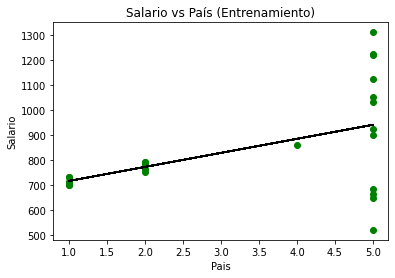

In [31]:
regresion=LinearRegression()
regresion.fit(x_train, y_train)
LinearRegression()
vision_train=plt
vision_train.scatter(x_train, y_train, color='green')
vision_train.plot(x_train, regresion.predict(x_train), color='black')
vision_train.title('Salario vs País (Entrenamiento)')
vision_train.xlabel('Pais')
vision_train.ylabel('Salario')
vision_train.show()

Actividad 4: Investigación de máximo dos hojas acerca de la regresión logística.
Agregar un ejemplo de un caso práctico.

CASO PRACTICO DE REGRESION LOGISTICA

In [22]:
"""
Regresión Logística
"""

########## LIBRERÍAS A UTILIZAR ##########

#Se importan la librerias a utilizar
from sklearn import datasets

########## PREPARAR LA DATA ##########

#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()
print(dataset)

########## ENTENDIMIENTO DE LA DATA ##########

#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(dataset.keys())
print()

#Verifico las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

#Seleccionamos todas las columnas
X = dataset.data

#Defino los datos correspondientes a las etiquetas
y = dataset.target

########## IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ##########

from sklearn.model_selection import train_test_split

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression

algoritmo = LogisticRegression()

#Entreno el modelo
algoritmo.fit(X_train, y_train)

#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)
print('Sensibilidad del modelo:', sensibilidad)
print('Puntaje F1 del modelo:', puntajef1)
print('Curva ROC - AUC del modelo:', roc_auc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 